<a href="https://colab.research.google.com/github/ravi-murugesan/ftds6/blob/master/Phase1_Pred1_GDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import math


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd 
df=pd.read_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/Clean1_all.csv',index_col=0)
df.head(3)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,sin_s,cos_s,Hour,DOY,HOD,sin_time,cos_time
0,0.0,0.0,2016-01-01 00:00:00,0.0,0,1.0,0.008494,25.0,20.0,0.000000,0.00000,0,1,3600,0.258819,0.965926
103,0.0,0.0,2016-01-01 01:00:00,0.0,0,1.0,0.008494,24.4,21.1,1.409539,0.51303,1,1,7200,0.500000,0.866025
206,0.0,0.0,2016-01-01 02:00:00,0.0,0,1.0,0.008494,22.8,21.1,0.000000,0.00000,2,1,10800,0.707107,0.707107


In [0]:
df.isnull().any()

building_id         True
meter               True
timestamp          False
meter_reading       True
site_id            False
primary_use         True
square_feet         True
air_temperature     True
dew_temperature     True
sin_s               True
cos_s               True
Hour               False
DOY                False
HOD                False
sin_time           False
cos_time           False
dtype: bool

In [4]:
df.shape

(20216235, 16)

In [0]:
df = df.iloc[:20216100]

In [6]:
df.shape

(20216100, 16)

In [0]:
df = df.ffill()

In [8]:
df.isnull().any()

building_id        False
meter              False
timestamp          False
meter_reading      False
site_id            False
primary_use        False
square_feet        False
air_temperature    False
dew_temperature    False
sin_s              False
cos_s              False
Hour               False
DOY                False
HOD                False
sin_time           False
cos_time           False
dtype: bool

In [0]:
df.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,sin_s,cos_s,Hour,DOY,HOD,sin_time,cos_time
0,0.0,0.0,2016-01-01 00:00:00,0.0,0,1.0,0.008494,25.0,20.0,0.000000,0.000000,0,1,3600,0.258819,0.965926
103,0.0,0.0,2016-01-01 01:00:00,0.0,0,1.0,0.008494,24.4,21.1,1.409539,0.513030,1,1,7200,0.500000,0.866025
206,0.0,0.0,2016-01-01 02:00:00,0.0,0,1.0,0.008494,22.8,21.1,0.000000,0.000000,2,1,10800,0.707107,0.707107
309,0.0,0.0,2016-01-01 03:00:00,0.0,0,1.0,0.008494,21.1,20.6,0.000000,0.000000,3,1,14400,0.866025,0.500000
412,0.0,0.0,2016-01-01 04:00:00,0.0,0,1.0,0.008494,20.0,20.0,-2.443201,-0.889252,4,1,18000,0.965926,0.258819


In [0]:
# df1 = df[df['building_id'] != 1099]

# sns.scatterplot(df1['DOY'],df1['meter_reading'],)


gc.collect();

In [0]:
df.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'air_temperature', 'dew_temperature',
       'sin_s', 'cos_s', 'Hour', 'DOY', 'HOD', 'sin_time', 'cos_time'],
      dtype='object')

In [0]:
df = df[['building_id', 'meter', 'meter_reading',
       'primary_use', 'square_feet', 'air_temperature', 'dew_temperature',
       'sin_s', 'cos_s', 'DOY', 'sin_time', 'cos_time']]

In [0]:
df.shape
import gc
gc.collect();

In [0]:
df.head(5)

,building_id,meter,meter_reading,primary_use,square_feet,air_temperature,dew_temperature,sin_s,cos_s,DOY,sin_time,cos_time
0,0.0,0.0,0.0,1.0,0.008494,25.0,20.0,0.000000,0.000000,1,0.258819,0.965926
103,0.0,0.0,0.0,1.0,0.008494,24.4,21.1,1.409539,0.513030,1,0.500000,0.866025
206,0.0,0.0,0.0,1.0,0.008494,22.8,21.1,0.000000,0.000000,1,0.707107,0.707107
309,0.0,0.0,0.0,1.0,0.008494,21.1,20.6,0.000000,0.000000,1,0.866025,0.500000
412,0.0,0.0,0.0,1.0,0.008494,20.0,20.0,-2.443201,-0.889252,1,0.965926,0.258819


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
import math

In [12]:
x = df.drop('meter_reading',axis=1)
y = df['meter_reading']

x.shape,y.shape

((20216100, 11), (20216100,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16172880, 11), (4043220, 11), (16172880,), (4043220,))

### Poly Features - Linear Regression

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.metrics import mean_squared_log_error
# np.sqrt(meansquaredlogerror(y_test, predictions))
poly_f = PolynomialFeatures(degree = 5)
X_train_poly = poly_f.fit_transform(X_train)


# print(x_train_poly)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred = poly_reg.predict(poly_f.fit_transform(X_test))
y_pred[y_pred < 0] = 0


# The mean squared error
print("Training Data metrics")
print(f"Mean squared error: {mean_squared_error(y_train, poly_reg.predict(poly_f.transform(X_train))): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_train, poly_reg.predict(poly_f.transform(X_train)))): .2f}")
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_train, poly_reg.predict(poly_f.transform(X_train)))) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_train, poly_reg.predict(poly_f.transform(X_train))):.2f}')
print("-------------------------------------------")

print("Test Data metrics")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

In [0]:
plt.scatter(df['DOY'], df['meter_reading'], color = 'red')
y_pred = poly_reg.predict(poly_f.fit_transform(X_test))
y_pred[y_pred < 0] = 0
plt.plot(df['DOY'], y_pred, color = 'blue')
plt.title('(Ploy Regression)')
plt.xlabel('Day of the year')
plt.ylabel('meter_reading')
plt.show()

## **Light GBM Regression**

In [0]:
# x = df_com.drop('meter_reading',axis=1)
# y = df_com['meter_reading']

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error


hyper_params = {
    'boosting_type' : 'dart',
    'metric': ['l2', 'mean_squared_log_error'],
    'learning_rate': 0.2,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 12,
    "num_leaves": 128,  
    "max_bin": 50,
    "num_iterations": 150,
    "n_estimators": 200
}

gbm = lgb.LGBMRegressor(** hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 3425.61	valid_0's l2: 2.0981e+10


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's l1: 3405.99	valid_0's l2: 2.08676e+10
[3]	valid_0's l1: 2840.48	valid_0's l2: 1.4576e+10
[4]	valid_0's l1: 2809.84	valid_0's l2: 1.38527e+10
[5]	valid_0's l1: 2397.75	valid_0's l2: 1.00528e+10
[6]	valid_0's l1: 2086.64	valid_0's l2: 7.5328e+09
[7]	valid_0's l1: 1858.38	valid_0's l2: 5.86765e+09
[8]	valid_0's l1: 1920.56	valid_0's l2: 6.2379e+09
[9]	valid_0's l1: 1849.15	valid_0's l2: 5.68305e+09
[10]	valid_0's l1: 1673	valid_0's l2: 4.70636e+09
[11]	valid_0's l1: 1547.16	valid_0's l2: 4.05269e+09
[12]	valid_0's l1: 1682.77	valid_0's l2: 4.78617e+09
[13]	valid_0's l1: 1655.47	valid_0's l2: 4.40622e+09
[14]	valid_0's l1: 1533.77	valid_0's l2: 3.74269e+09
[15]	valid_0's l1: 1443.21	valid_0's l2: 3.29354e+09
[16]	valid_0's l1: 1379.64	valid_0's l2: 3.03406e+09
[17]	valid_0's l1: 1370.82	valid_0's l2: 3.02246e+09
[18]	valid_0's l1: 1361.39	valid_0's l2: 2.93449e+09
[19]	valid_0's l1: 1353.57	valid_0's l2: 2.85638e+09
[20]	valid_0's l1: 1350.27	valid_0's l2: 2.79991e+09
[21]	va

In [36]:
type(gbm)

lightgbm.sklearn.LGBMRegressor

In [0]:
import pickle
pickle.dump(gbm, open("/content/drive/My Drive/Energy/ashrae-energy-prediction/lgb_energy.pickle.dat", "wb"))

In [0]:
loaded_model = pickle.load(open("/content/drive/My Drive/Energy/ashrae-energy-prediction/lgb_energy.pickle.dat", "rb"))

In [42]:
# predict
y_pred = loaded_model.predict(X_test)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

Test Data metrics
The rmse of prediction is: 46024.583222718495
Variance score: 0.91
Root Mean squared Log error: 2.44


In [37]:
lgb.save(model, "/content/drive/My Drive/Energy/ashrae-energy-prediction/lgb_model.txt")

AttributeError: ignored

In [35]:
type(gbm.best_iteration_)

int

In [19]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error



hyper_params = {
    'boosting_type' : 'dart',
    'metric': ['l2', 'mean_squared_log_error'],
    'learning_rate': 0.02,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 12,
    "num_leaves": 128,  
    "max_bin": 50,
    "num_iterations": 100000,
    "n_estimators": 200
}

gbm = lgb.LGBMRegressor(** hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 3689.32	valid_0's l2: 2.42896e+10


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's l1: 3681.58	valid_0's l2: 2.42735e+10
[3]	valid_0's l1: 3615.45	valid_0's l2: 2.34481e+10
[4]	valid_0's l1: 3601.34	valid_0's l2: 2.32991e+10
[5]	valid_0's l1: 3537.31	valid_0's l2: 2.25171e+10
[6]	valid_0's l1: 3474.57	valid_0's l2: 2.17612e+10
[7]	valid_0's l1: 3413.35	valid_0's l2: 2.10377e+10
[8]	valid_0's l1: 3424.03	valid_0's l2: 2.11641e+10
[9]	valid_0's l1: 3390.71	valid_0's l2: 2.08094e+10
[10]	valid_0's l1: 3331.15	valid_0's l2: 2.01288e+10
[11]	valid_0's l1: 3272.67	valid_0's l2: 1.94641e+10
[12]	valid_0's l1: 3309.52	valid_0's l2: 1.98821e+10
[13]	valid_0's l1: 3281.96	valid_0's l2: 1.95654e+10
[14]	valid_0's l1: 3224.89	valid_0's l2: 1.89127e+10
[15]	valid_0's l1: 3169.45	valid_0's l2: 1.82933e+10
[16]	valid_0's l1: 3114.47	valid_0's l2: 1.77013e+10
[17]	valid_0's l1: 3104.6	valid_0's l2: 1.75968e+10
[18]	valid_0's l1: 3079.94	valid_0's l2: 1.73264e+10
[19]	valid_0's l1: 3056.11	valid_0's l2: 1.70692e+10
[20]	valid_0's l1: 3028.69	valid_0's l2: 1.68005e+10
[2

KeyboardInterrupt: ignored

In [0]:
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

NameError: ignored

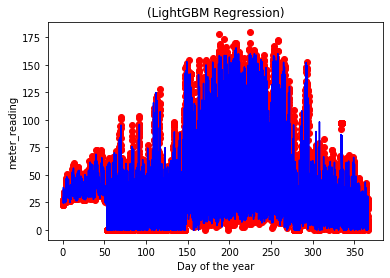

In [0]:
plt.scatter(df['DOY'], df['meter_reading'], color = 'red')
y_pred = gbm.predict(x, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0
plt.plot(df['DOY'], y_pred, color = 'blue')
plt.title('(LightGBM Regression)')
plt.xlabel('Day of the year')
plt.ylabel('meter_reading')
plt.show()

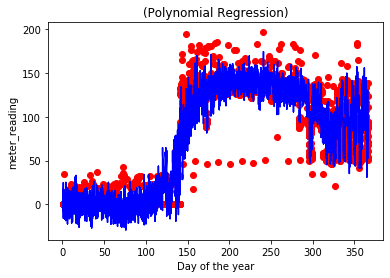

In [0]:
plt.scatter(df_com3['DOY'], df_com3['meter_reading'], color = 'red')
plt.plot(df_com3['DOY'], poly_reg.predict(poly_f.transform(x_train)), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Day of the year')
plt.ylabel('meter_reading')
plt.show()

In [0]:
# GDBoost regressor

# ** GDBoost regressor** 

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error


est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.02, max_depth=3, random_state=42, loss='ls').fit(X_train, y_train)

mean_squared_error(y_train, est.predict(X_train))


# params = {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 2,
#           'learning_rate': 0.25, 'loss': 'ls','random_state': 42}
# model = ensemble.GradientBoostingRegressor(**params)

# model.fit(X_train, y_train)
# mse = mean_squared_error(y_test, clf.predict(X_test))
# print("MSE: %.4f" % mse)

12466215472.2462

GB model
mean squared error : 12466215472.2462
Root mean squared error : 111652.476

error improved from 153204 to 111652 with GB

NN model
Mean squared error: 23471735448.13
Root Mean squared error: 153204.88

In [0]:
y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0

# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

NameError: ignored

In [0]:
model_score = model.score(X_train,y_train)
print('R2 sq: ',model_score)

In [0]:
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

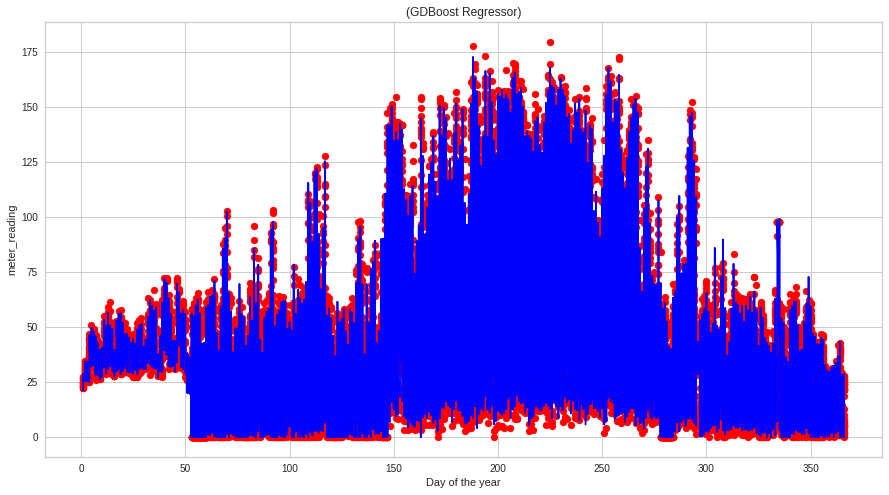

In [0]:
plt.figure(figsize=(15,8))
plt.scatter(df['DOY'], df['meter_reading'], color = 'red')
y_pred = est.predict(x)
y_pred[y_pred < 0] = 0
plt.plot(df['DOY'], y_pred, color = 'blue')
plt.title('(GDBoost Regressor)')
plt.xlabel('Day of the year')
plt.ylabel('meter_reading')
plt.show()

In [0]:
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y, y_pred)) :.2f}")

Root Mean squared Log error: 0.34


# Keras NN training

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(x, y, epochs=25, batch_size=1000, validation_split = 0.2, callbacks=callbacks_list)




Train on 16172880 samples, validate on 4043220 samples
Epoch 1/25





16172880/16172880 [==============================] - 30s 2us/step - loss: 2466.2591 - mean_absolute_error: 2466.2591 - val_loss: 440.7848 - val_mean_absolute_error: 440.7848

Epoch 00001: val_loss improved from inf to 440.78483, saving model to Weights-001--440.78483.hdf5
Epoch 2/25
16172880/16172880 [==============================] - 20s 1us/step - loss: 2402.3852 - mean_absolute_error: 2402.3852 - val_loss: 437.0633 - val_mean_absolute_error: 437.0633

Epoch 00002: val_loss improved from 440.78483 to 437.06333, saving model to Weights-002--437.06333.hdf5
Epoch 3/25
16172880/16172880 [==============================] - 20s 1us/step - loss: 2371.2755 - mean_absolute_error: 2371.2755 - val_loss: 427.9801 - val_mean_absolute_error: 427.9801

Epoch 00003: val_loss improved from 437.06333 to 427.98010, saving model to Weights-003--427.98010.hdf5
Epoch 4/25
16172880/16172880 [==============================] - 20s 1us/s

In [0]:
# Load wights file of the best model :
# 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
# wights_file = 'Weights-478--18738.19831.hdf5'

wights_file = 'Weights-003--427.98010.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [0]:
y_pred = NN_model.predict(x)
y_pred[y_pred<0] = 0

# The mean squared error
print(f"Mean squared error:{mean_squared_error(y, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y, y_pred)) :.2f}")
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y, y_pred)) :.2f}")

# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y, y_pred):.2f}')

Mean squared error: 23471735448.13
Root Mean squared error: 153204.88
Root Mean squared Log error: 1.61
Variance score: 0.00


In [0]:
y_pred[y_pred < 0] = 0

In [0]:
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y, y_pred)) :.4f}")

Root Mean squared Log error: 1.61
